# Import libs

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.nn import ModuleList
from torch import nn
import torch.optim as optim

# custom libs
from libs.PretrainedModels import AlexNet_cc, SqueezeNet_cc, InceptionV3_cc, ResNet18_cc
from libs.utils import get_model_name, import_dataset, reverse_norm, init_model
from libs.Dataset import dst

In [2]:
random.seed(1996)
np.random.seed(1996)

In [3]:
# parameters for dataloaders
batch_size=32
num_workers=2
drop_last=True

In [4]:
dst.create_data_loader(batch_size=batch_size, num_workers=num_workers, drop_last=drop_last)

## Visualizing dataset

#### Training

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


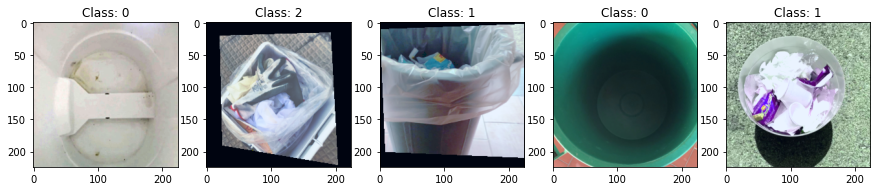

In [5]:
train_features, train_labels = next(iter(dst.training_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Class: %s" % train_labels[0].numpy())
    img = train_features[0].squeeze()
    label = train_labels[0]
    plt.imshow(reverse_norm(img.numpy().transpose(1, 2, 0)))
    train_features, train_labels = next(iter(dst.training_loader))
plt.show()

#### Validation

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


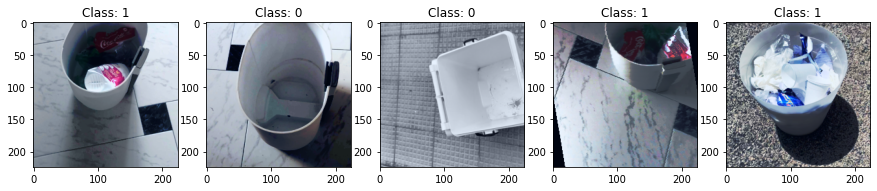

In [6]:
val_features, val_labels = next(iter(dst.validation_loader))
print(f"Feature batch shape: {val_features.size()}")
print(f"Labels batch shape: {val_labels.size()}")

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Class: %s" % val_labels[0].numpy())
    img = val_features[0].squeeze()
    label = val_labels[0]
    plt.imshow(reverse_norm(img.numpy().transpose(1, 2, 0)))
    val_features, val_labels = next(iter(dst.validation_loader))
plt.show()

#### Test

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


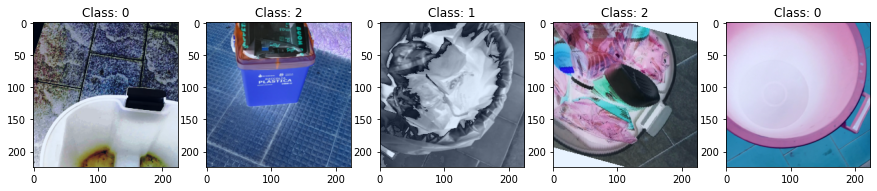

In [7]:
test_features, test_labels = next(iter(dst.test_loader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Class: %s" % test_labels[0].numpy())
    img = test_features[0].squeeze()
    label = test_labels[0]
    plt.imshow(reverse_norm(img.numpy().transpose(1, 2, 0)))
    test_features, test_labels = next(iter(dst.test_loader))
plt.show()

## Using LR finder libs

In [9]:
from torch_lr_finder import LRFinder

criterion = nn.CrossEntropyLoss()

In [10]:
optim_lr = 0.001
momentum = 0.99
end_lr = 0.01
num_iter = 100

### Finding best lr for AlexNet

In [12]:
alexnet = init_model(creator=AlexNet_cc(), model_name='AlexNet', feature_extract=True, use_pretrained=True)
alexnet = alexnet.ret_model()

optimizer = optim.SGD(alexnet.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(alexnet, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Initializing: AlexNet


  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [01:00<1:40:34, 60.96s/it]

  2%|▏         | 2/100 [02:04<1:41:54, 62.40s/it]

  3%|▎         | 3/100 [03:07<1:41:21, 62.70s/it]

  4%|▍         | 4/100 [04:12<1:41:30, 63.45s/it]

  5%|▌         | 5/100 [05:19<1:42:46, 64.91s/it]

  6%|▌         | 6/100 [06:28<1:44:05, 66.45s/it]

  7%|▋         | 7/100 [07:36<1:43:43, 66.92s/it]

  8%|▊         | 8/100 [08:46<1:43:54, 67.77s/it]

Suggested lr is `0.0011`

### Finding best lr for SqueezNet -- TO REDO WITH NEW DST

In [11]:
squeezenet = init_model(creator=SqueezeNet_cc(), model_name='SqueezeNet', feature_extract=True, use_pretrained=True)
squeezenet = squeezenet.ret_model()

optimizer = optim.SGD(squeezenet.parameters(), lr=optim_lr, momentum=momentum)

Initializing: SqueezeNet


100%|██████████| 100/100 [3:11:31<00:00, 114.92s/it]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.10E-03


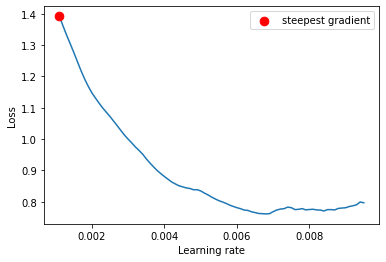

In [9]:
lr_finder = LRFinder(squeezenet, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Suggested lr is `0.0011`

### Finding best lr for ResNet -- TO REDO WITH NEW DST

Initializing: ResNet


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/daniloleocata/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:26<00:00, 1.80MB/s]
100%|██████████| 100/100 [4:09:28<00:00, 149.69s/it]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.20E-03


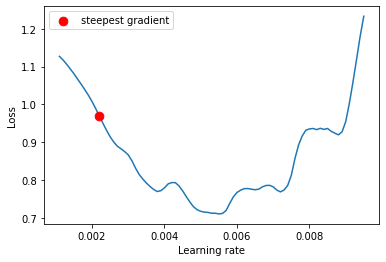

In [8]:
resnet = init_model(creator=ResNet18_cc(), model_name='ResNet', feature_extract=True, use_pretrained=True)
resnet = resnet.ret_model()

optimizer = optim.SGD(resnet.parameters(), lr=optim_lr, momentum=momentum)

lr_finder = LRFinder(resnet, optimizer, criterion)
lr_finder.range_test(train_loader=dst.training_loader, val_loader=dst.validation_loader, end_lr=end_lr, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

lr suggested is `0.0022`